In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import re
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [2]:
measure_data = pd.read_csv('/content/measures-as-defined.csv')
Commodities_data = pd.read_csv('/content/commodities-report.csv')
MSC_data = pd.read_csv('/content/measures-on-declarable-commodities (1).csv')

In [3]:
chunk_size = 100000

# Function to process each chunk
def process(chunk):
    return chunk

# List to store temporary file names
processed_chunks = []

# Step 1: Process data in chunks and save to temporary files
for i, chunk in enumerate(pd.read_csv('/content/measures-on-declarable-commodities (1).csv', chunksize=chunk_size)):
    processed_chunk = process(chunk)
    temp_filename = f'processed_chunk_{i}.csv'
    processed_chunk.to_csv(temp_filename, index=False)
    processed_chunks.append(temp_filename)

In [4]:
# Step 2: Combine processed chunks
dataframes = []

for temp_filename in processed_chunks:
    df_chunk = pd.read_csv(temp_filename)
    dataframes.append(df_chunk)

MSC_data = pd.concat(dataframes, ignore_index=True)
MSC_data.to_csv('final_combined_dataset.csv', index=False)


In [5]:
# Step 3: Load the combined dataset
MSC_data = pd.read_csv('final_combined_dataset.csv')

# Verify the loaded data
print(MSC_data.head())
print(MSC_data.info())


   id  commodity__sid  commodity__code  commodity__indent  \
0   1           93796        101210000                  2   
1   2           93796        101210000                  2   
2   3           93796        101210000                  2   
3   4           93796        101210000                  2   
4   5           93796        101210000                  2   

       commodity__description  measure__sid  measure__type__id  \
0  Pure-bred breeding animals      20000000                103   
1  Pure-bred breeding animals      20184077                103   
2  Pure-bred breeding animals      20125835                142   
3  Pure-bred breeding animals      20079764                142   
4  Pure-bred breeding animals      20234871                142   

  measure__type__description measure__additional_code__code  \
0         Third country duty                            NaN   
1         Third country duty                            NaN   
2          Tariff preference                   

In [ ]:
MSC_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098899 entries, 0 to 1098898
Data columns (total 24 columns):
 #   Column                                              Non-Null Count    Dtype  
---  ------                                              --------------    -----  
 0   id                                                  1098899 non-null  int64  
 1   commodity__sid                                      1098899 non-null  int64  
 2   commodity__code                                     1098899 non-null  int64  
 3   commodity__indent                                   1098899 non-null  int64  
 4   commodity__description                              1098899 non-null  object 
 5   measure__sid                                        1098899 non-null  int64  
 6   measure__type__id                                   1098899 non-null  int64  
 7   measure__type__description                          1098899 non-null  object 
 8   measure__additional_code__code                      

In [ ]:
measure_data

,id,commodity__sid,commodity__code,commodity__indent,commodity__description,measure__sid,measure__type__id,measure__type__description,measure__additional_code__code,measure__additional_code__description,...,measure__footnotes,measure__conditions,measure__geographical_area__sid,measure__geographical_area__id,measure__geographical_area__description,measure__excluded_geographical_areas__ids,measure__excluded_geographical_areas__descriptions,measure__quota__order_number,measure__regulation__id,measure__regulation__url
0,1,27623,100000000,0,LIVE ANIMALS,20184077,103,Third country duty,NaN,NaN,...,NaN,NaN,505,1080,Channel Islands,NaN,NaN,NaN,S.I. 2020/1430,https://www.legislation.gov.uk/uksi/2020/1430
1,2,27623,100000000,0,LIVE ANIMALS,20125835,142,Tariff preference,NaN,NaN,...,NaN,NaN,349,1013,European Union,NaN,NaN,NaN,NaN,NaN
2,3,27623,100000000,0,LIVE ANIMALS,20079764,142,Tariff preference,NaN,NaN,...,NaN,NaN,351,1033,CARIFORUM,NaN,NaN,NaN,NaN,NaN
3,4,27623,100000000,0,LIVE ANIMALS,20234871,142,Tariff preference,NaN,NaN,...,NaN,NaN,455,1034,Eastern and Southern Africa States,KM|MG,Comoros|Madagascar,NaN,NaN,NaN
4,5,27623,100000000,0,LIVE ANIMALS,20079954,142,Tariff preference,NaN,NaN,...,NaN,NaN,468,1035,SADC EPA,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84923,84924,84894,9880840000,1,Classified in Chapter 84,20233381,724,Import control of fluorinated greenhouse gases,NaN,NaN,...,NaN,"condition:B,certificate:Y054,action:26|conditi...",400,1011,ERGA OMNES,NaN,NaN,NaN,517/2014,https://www.legislation.gov.uk/eur/2014/517
84924,84925,84895,9880850000,1,Classified in Chapter 85,20233382,724,Import control of fluorinated greenhouse gases,NaN,NaN,...,NaN,"condition:B,certificate:Y054,action:26|conditi...",400,1011,ERGA OMNES,NaN,NaN,NaN,517/2014,https://www.legislation.gov.uk/eur/2014/517
84925,84926,93473,9905000000,1,Personal property belonging to natural persons...,20192037,103,Third country duty,NaN,NaN,...,NaN,NaN,400,1011,ERGA OMNES,NaN,NaN,NaN,2020/1430,NaN
84926,84927,93473,9905000000,1,Personal property belonging to natural persons...,20228418,103,Third country duty,NaN,NaN,...,NaN,NaN,505,1080,Channel Islands,NaN,NaN,NaN,2020/1430,NaN


In [ ]:
measure_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84928 entries, 0 to 84927
Data columns (total 24 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   id                                                  84928 non-null  int64  
 1   commodity__sid                                      84928 non-null  int64  
 2   commodity__code                                     84928 non-null  int64  
 3   commodity__indent                                   84928 non-null  int64  
 4   commodity__description                              84928 non-null  object 
 5   measure__sid                                        84928 non-null  int64  
 6   measure__type__id                                   84928 non-null  int64  
 7   measure__type__description                          84928 non-null  object 
 8   measure__additional_code__code                      10356 non-null  object 


In [ ]:
measure_data .isnull().sum()

id                                                        0
commodity__sid                                            0
commodity__code                                           0
commodity__indent                                         0
commodity__description                                    0
measure__sid                                              0
measure__type__id                                         0
measure__type__description                                0
measure__additional_code__code                        74572
measure__additional_code__description                 74572
measure__duty_expression                              29087
measure__effective_start_date                             0
measure__effective_end_date                           72755
measure__reduction_indicator                          84928
measure__footnotes                                    60986
measure__conditions                                   54080
measure__geographical_area__sid         

In [ ]:
measure_data.duplicated().sum()

0

In [ ]:
Commodities_data

,id,commodity__sid,commodity__code,commodity__suffix,commodity__description,commodity__validity_start,commodity__validity_end,parent__sid,parent__code,parent__suffix
0,1,27623,100000000,80,LIVE ANIMALS,1971-12-31,NaN,NaN,NaN,NaN
1,2,27624,101000000,80,"Live horses, asses, mules and hinnies",1972-01-01,NaN,27623.0,1.000000e+08,80.0
2,3,93797,101210000,10,Horses,2012-01-01,NaN,27624.0,1.010000e+08,80.0
3,4,93796,101210000,80,Pure-bred breeding animals,2012-01-01,NaN,93797.0,1.012100e+08,10.0
4,5,93798,101290000,80,Other,2012-01-01,NaN,93797.0,1.012100e+08,10.0
...,...,...,...,...,...,...,...,...,...,...
25818,25819,90779,9931000000,80,Goods delivered for the crew of the offshore i...,2009-01-01,NaN,88694.0,9.900000e+09,80.0
25819,25820,90780,9931240000,80,Goods of CN Chapters 1 to 24,2009-01-01,NaN,90779.0,9.931000e+09,80.0
25820,25821,90781,9931270000,80,Goods of CN Chapter 27,2009-01-01,NaN,90779.0,9.931000e+09,80.0
25821,25822,90782,9931990000,80,Goods classified elsewhere,2009-01-01,NaN,90779.0,9.931000e+09,80.0


In [ ]:
Commodities_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25823 entries, 0 to 25822
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         25823 non-null  int64  
 1   commodity__sid             25823 non-null  int64  
 2   commodity__code            25823 non-null  int64  
 3   commodity__suffix          25823 non-null  int64  
 4   commodity__description     25823 non-null  object 
 5   commodity__validity_start  25823 non-null  object 
 6   commodity__validity_end    1 non-null      object 
 7   parent__sid                25725 non-null  float64
 8   parent__code               25725 non-null  float64
 9   parent__suffix             25725 non-null  float64
dtypes: float64(3), int64(4), object(3)
memory usage: 2.0+ MB


In [ ]:
Commodities_data.isnull().sum()

id                               0
commodity__sid                   0
commodity__code                  0
commodity__suffix                0
commodity__description           0
commodity__validity_start        0
commodity__validity_end      25822
parent__sid                     98
parent__code                    98
parent__suffix                  98
dtype: int64

In [ ]:
Commodities_data.duplicated().sum()

0

In [ ]:
cols = ['commodity__code','measure__sid','measure__type__description','commodity__indent']

In [ ]:
df1 = measure_data[cols]

In [ ]:
df1

,commodity__code,measure__sid,measure__type__description,commodity__indent
0,100000000,20184077,Third country duty,0
1,100000000,20125835,Tariff preference,0
2,100000000,20079764,Tariff preference,0
3,100000000,20234871,Tariff preference,0
4,100000000,20079954,Tariff preference,0
...,...,...,...,...
84923,9880840000,20233381,Import control of fluorinated greenhouse gases,1
84924,9880850000,20233382,Import control of fluorinated greenhouse gases,1
84925,9905000000,20192037,Third country duty,1
84926,9905000000,20228418,Third country duty,1


In [ ]:
df1.isnull().sum()

commodity__code               0
measure__sid                  0
measure__type__description    0
commodity__indent             0
dtype: int64

In [ ]:
cols2 = ['commodity__code','commodity__suffix','commodity__validity_start','commodity__sid','commodity__description']

In [ ]:
df2 = Commodities_data[cols2]

In [ ]:
df2

,commodity__code,commodity__suffix,commodity__validity_start,commodity__sid,commodity__description
0,100000000,80,1971-12-31,27623,LIVE ANIMALS
1,101000000,80,1972-01-01,27624,"Live horses, asses, mules and hinnies"
2,101210000,10,2012-01-01,93797,Horses
3,101210000,80,2012-01-01,93796,Pure-bred breeding animals
4,101290000,80,2012-01-01,93798,Other
...,...,...,...,...,...
25818,9931000000,80,2009-01-01,90779,Goods delivered for the crew of the offshore i...
25819,9931240000,80,2009-01-01,90780,Goods of CN Chapters 1 to 24
25820,9931270000,80,2009-01-01,90781,Goods of CN Chapter 27
25821,9931990000,80,2009-01-01,90782,Goods classified elsewhere


In [ ]:
merged_df = pd.merge(df1, df2, on='commodity__code', how='inner')

In [ ]:
merged_df

,commodity__code,measure__sid,measure__type__description,commodity__indent,commodity__suffix,commodity__validity_start,commodity__sid,commodity__description
0,100000000,20184077,Third country duty,0,80,1971-12-31,27623,LIVE ANIMALS
1,100000000,20125835,Tariff preference,0,80,1971-12-31,27623,LIVE ANIMALS
2,100000000,20079764,Tariff preference,0,80,1971-12-31,27623,LIVE ANIMALS
3,100000000,20234871,Tariff preference,0,80,1971-12-31,27623,LIVE ANIMALS
4,100000000,20079954,Tariff preference,0,80,1971-12-31,27623,LIVE ANIMALS
...,...,...,...,...,...,...,...,...
101403,9905000000,20192037,Third country duty,1,10,2011-01-01,93477,"Certain goods, as provided for in Council Regu..."
101404,9905000000,20192037,Third country duty,1,80,2011-01-01,93473,Personal property belonging to natural persons...
101405,9905000000,20228418,Third country duty,1,10,2011-01-01,93477,"Certain goods, as provided for in Council Regu..."
101406,9905000000,20228418,Third country duty,1,80,2011-01-01,93473,Personal property belonging to natural persons...


In [ ]:
merged_df.isnull().sum()

commodity__code               0
measure__sid                  0
measure__type__description    0
commodity__indent             0
commodity__suffix             0
commodity__validity_start     0
commodity__sid                0
commodity__description        0
dtype: int64

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101408 entries, 0 to 101407
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   commodity__code             101408 non-null  int64 
 1   measure__sid                101408 non-null  int64 
 2   measure__type__description  101408 non-null  object
 3   commodity__indent           101408 non-null  int64 
 4   commodity__suffix           101408 non-null  int64 
 5   commodity__validity_start   101408 non-null  object
 6   commodity__sid              101408 non-null  int64 
 7   commodity__description      101408 non-null  object
dtypes: int64(5), object(3)
memory usage: 6.2+ MB


In [ ]:
cols3 = ['commodity__code','measure__geographical_area__sid','measure__geographical_area__description','measure__duty_expression']

In [ ]:
df3 = MSC_data[cols3]

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098899 entries, 0 to 1098898
Data columns (total 4 columns):
 #   Column                                   Non-Null Count    Dtype 
---  ------                                   --------------    ----- 
 0   commodity__code                          1098899 non-null  int64 
 1   measure__geographical_area__sid          1098899 non-null  int64 
 2   measure__geographical_area__description  1098899 non-null  object
 3   measure__duty_expression                 952169 non-null   object
dtypes: int64(2), object(2)
memory usage: 33.5+ MB


In [ ]:
merged_df1 = pd.merge(merged_df, df3,  on='commodity__code', how='inner')

In [ ]:
merged_df1.dropna(inplace=True)

In [ ]:
merged_df1.drop_duplicates(inplace=True)

In [ ]:
merged_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3730153 entries, 0 to 5993406
Data columns (total 11 columns):
 #   Column                                   Dtype 
---  ------                                   ----- 
 0   commodity__code                          int64 
 1   measure__sid                             int64 
 2   measure__type__description               object
 3   commodity__indent                        int64 
 4   commodity__suffix                        int64 
 5   commodity__validity_start                object
 6   commodity__sid                           int64 
 7   commodity__description                   object
 8   measure__geographical_area__sid          int64 
 9   measure__geographical_area__description  object
 10  measure__duty_expression                 object
dtypes: int64(6), object(5)
memory usage: 341.5+ MB


In [ ]:
merged_df1['commodity__code'] = merged_df1['commodity__code'].astype('int32')
merged_df1['commodity__sid'] = merged_df1['commodity__sid'].astype('int32')
merged_df1['measure__sid'] = merged_df1['measure__sid'].astype('int32')
merged_df1['commodity__indent'] = merged_df1['commodity__indent'].astype('int32')
merged_df1['commodity__suffix'] = merged_df1['commodity__suffix'].astype('int32')
merged_df1['measure__geographical_area__sid'] = merged_df1['measure__geographical_area__sid'].astype('int32')

In [ ]:
merged_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3730153 entries, 0 to 5993406
Data columns (total 11 columns):
 #   Column                                   Dtype 
---  ------                                   ----- 
 0   commodity__code                          int32 
 1   measure__sid                             int32 
 2   measure__type__description               object
 3   commodity__indent                        int32 
 4   commodity__suffix                        int32 
 5   commodity__validity_start                object
 6   commodity__sid                           int32 
 7   commodity__description                   object
 8   measure__geographical_area__sid          int32 
 9   measure__geographical_area__description  object
 10  measure__duty_expression                 object
dtypes: int32(6), object(5)
memory usage: 256.1+ MB


In [ ]:
MSC_data_cleaned = merged_df1.iloc[1:1500000]

In [ ]:
Oceania = ["Australia", "Fiji", "Kiribati", "Marshall Islands", "Micronesia", "Nauru", "New Zealand", "Palau",
          "Papua New Guinea", "Samoa", "Solomon Islands", "Tonga", "Tuvalu", "Vanuatu"]

MSC_data_Oceania = MSC_data_cleaned[MSC_data_cleaned['measure__geographical_area__description'].isin(Oceania)]

In [ ]:

MSC_data_Oceania.info()

<class 'pandas.core.frame.DataFrame'>
Index: 172838 entries, 10 to 1709770
Data columns (total 11 columns):
 #   Column                                   Non-Null Count   Dtype 
---  ------                                   --------------   ----- 
 0   commodity__code                          172838 non-null  int32 
 1   measure__sid                             172838 non-null  int32 
 2   measure__type__description               172838 non-null  object
 3   commodity__indent                        172838 non-null  int32 
 4   commodity__suffix                        172838 non-null  int32 
 5   commodity__validity_start                172838 non-null  object
 6   commodity__sid                           172838 non-null  int32 
 7   commodity__description                   172838 non-null  object
 8   measure__geographical_area__sid          172838 non-null  int32 
 9   measure__geographical_area__description  172838 non-null  object
 10  measure__duty_expression                 172838

In [ ]:

MSC_data_Oceania['measure__geographical_area__description'].unique()


array(['Australia', 'Fiji', 'New Zealand', 'Papua New Guinea',
       'Solomon Islands', 'Samoa'], dtype=object)

In [ ]:

MSC_data_Oceania['commodity__code'] = MSC_data_Oceania['commodity__code'].astype('int32')
MSC_data_Oceania['measure__sid'] = MSC_data_Oceania['measure__sid'].astype('int32')
MSC_data_Oceania['commodity__indent'] = MSC_data_Oceania['commodity__indent'].astype('int32')
MSC_data_Oceania['commodity__suffix'] = MSC_data_Oceania['commodity__suffix'].astype('int32')
MSC_data_Oceania['commodity__sid'] = MSC_data_Oceania['commodity__sid'].astype('int32')
MSC_data_Oceania['measure__geographical_area__sid'] = MSC_data_Oceania['measure__geographical_area__sid'].astype('int32')
MSC_data_Oceania['measure__duty_expression'] = MSC_data_Oceania['measure__duty_expression'].astype('str')

In [ ]:
MSC_data_Oceania.info()

<class 'pandas.core.frame.DataFrame'>
Index: 172838 entries, 10 to 1709770
Data columns (total 11 columns):
 #   Column                                   Non-Null Count   Dtype 
---  ------                                   --------------   ----- 
 0   commodity__code                          172838 non-null  int32 
 1   measure__sid                             172838 non-null  int32 
 2   measure__type__description               172838 non-null  object
 3   commodity__indent                        172838 non-null  int32 
 4   commodity__suffix                        172838 non-null  int32 
 5   commodity__validity_start                172838 non-null  object
 6   commodity__sid                           172838 non-null  int32 
 7   commodity__description                   172838 non-null  object
 8   measure__geographical_area__sid          172838 non-null  int32 
 9   measure__geographical_area__description  172838 non-null  object
 10  measure__duty_expression                 172838

In [ ]:
# Extract and convert percentages, ignoring non-percentage components
MSC_data_Oceania['measure__duty_expression'] = (
    MSC_data_Oceania['measure__duty_expression']
    .str.extract(r'(\d+)%')  # Extract the number before '%'
    .astype(float) / 100  # Convert to float, handle non-numeric with 'ignore'
).fillna(0)

In [ ]:
MSC_data_Oceania['measure__duty_expression'].unique()

array([0.  , 0.12, 0.2 , 0.09, 0.14, 0.05, 0.06, 0.03, 0.08, 0.04, 0.02,
       0.07, 0.01, 0.1 , 0.16, 0.15])

In [ ]:

MSC_data_Oceania['commodity__validity_start'] = pd.to_datetime(MSC_data_Oceania['commodity__validity_start'])

In [ ]:

MSC_data_Oceania['commodity__validity_year'] = pd.to_datetime(MSC_data_Oceania['commodity__validity_start']).dt.year



In [ ]:
MSC_data_Oceania.info()

<class 'pandas.core.frame.DataFrame'>
Index: 172838 entries, 10 to 1709770
Data columns (total 12 columns):
 #   Column                                   Non-Null Count   Dtype         
---  ------                                   --------------   -----         
 0   commodity__code                          172838 non-null  int32         
 1   measure__sid                             172838 non-null  int32         
 2   measure__type__description               172838 non-null  object        
 3   commodity__indent                        172838 non-null  int32         
 4   commodity__suffix                        172838 non-null  int32         
 5   commodity__validity_start                172838 non-null  datetime64[ns]
 6   commodity__sid                           172838 non-null  int32         
 7   commodity__description                   172838 non-null  object        
 8   measure__geographical_area__sid          172838 non-null  int32         
 9   measure__geographical_area__d

In [ ]:
MSC_data_Oceania['measure__geographical_area__description'].unique()

array(['Australia', 'Fiji', 'New Zealand', 'Papua New Guinea',
       'Solomon Islands', 'Samoa'], dtype=object)

In [ ]:
MSC_data_Oceania_all = MSC_data_Oceania[MSC_data_Oceania['measure__geographical_area__description'].isin(['Australia', 'Fiji', 'New Zealand', 'Papua New Guinea',
       'Solomon Islands', 'Samoa'])]


# ***Data Visualization***

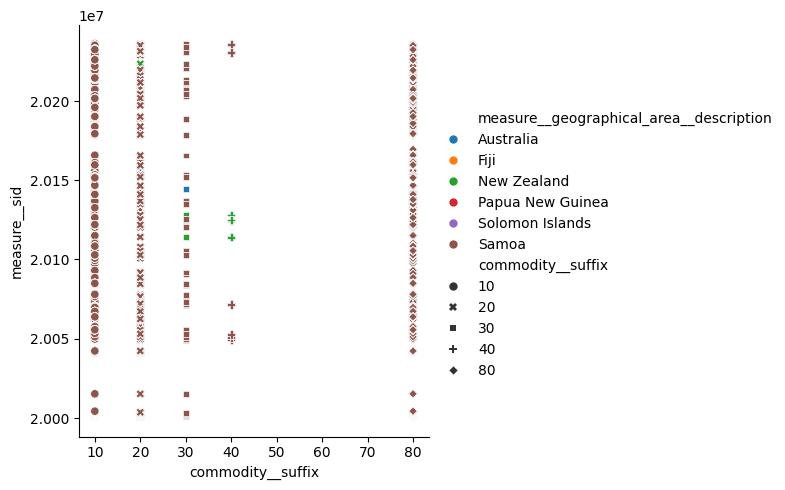

In [ ]:
sns.relplot(data = MSC_data_Oceania_all, kind = 'scatter', x = 'commodity__suffix', y = 'measure__sid', hue = 'measure__geographical_area__description', style = 'commodity__suffix' )

(array([47914.,     0.,     0.,   887., 14621.,  9441.,  7682., 52488.,
        26209., 13596.]),
 array([1972. , 1977.2, 1982.4, 1987.6, 1992.8, 1998. , 2003.2, 2008.4,
        2013.6, 2018.8, 2024. ]),
 <BarContainer object of 10 artists>)

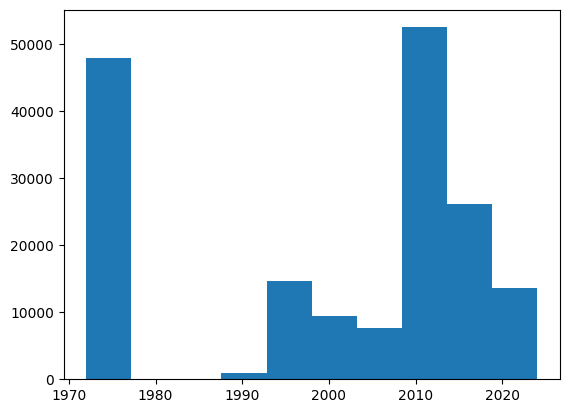

In [ ]:
plt.hist(MSC_data_Oceania['commodity__validity_year'])

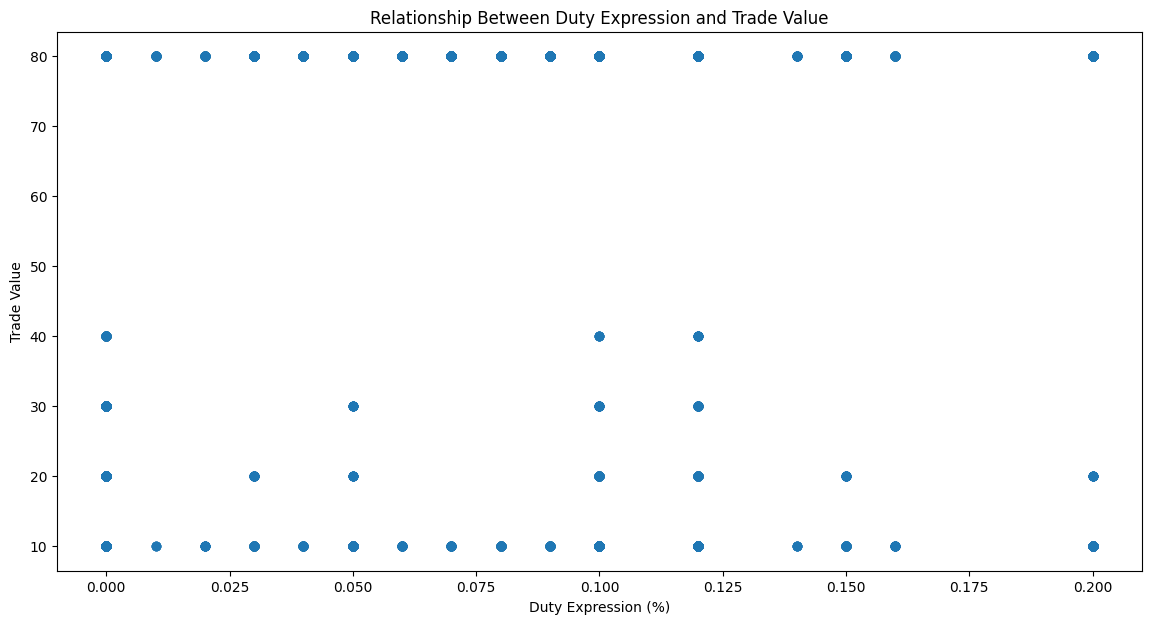

In [ ]:
# Scatter Plot - Relationship between trade value and another metric (e.g., duty expression)
plt.figure(figsize=(14, 7))
plt.scatter(MSC_data_Oceania['measure__duty_expression'], MSC_data_Oceania['commodity__suffix'])
plt.title('Relationship Between Duty Expression and Trade Value')
plt.xlabel('Duty Expression (%)')
plt.ylabel('Trade Value')
plt.show()

<Axes: >

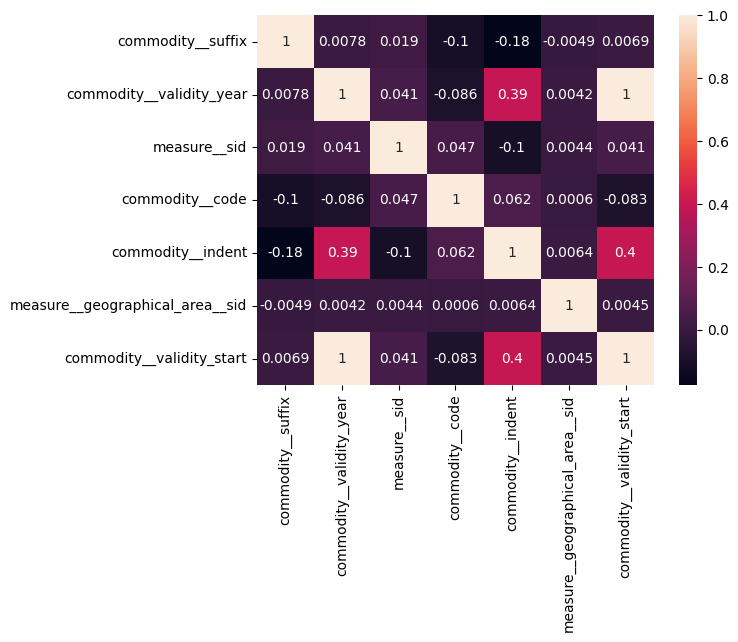

In [ ]:

sns.heatmap(MSC_data_Oceania[['commodity__suffix','commodity__validity_year', 'measure__sid', 'commodity__code', 'commodity__indent', 'measure__geographical_area__sid','commodity__validity_start']].corr(),annot = True)

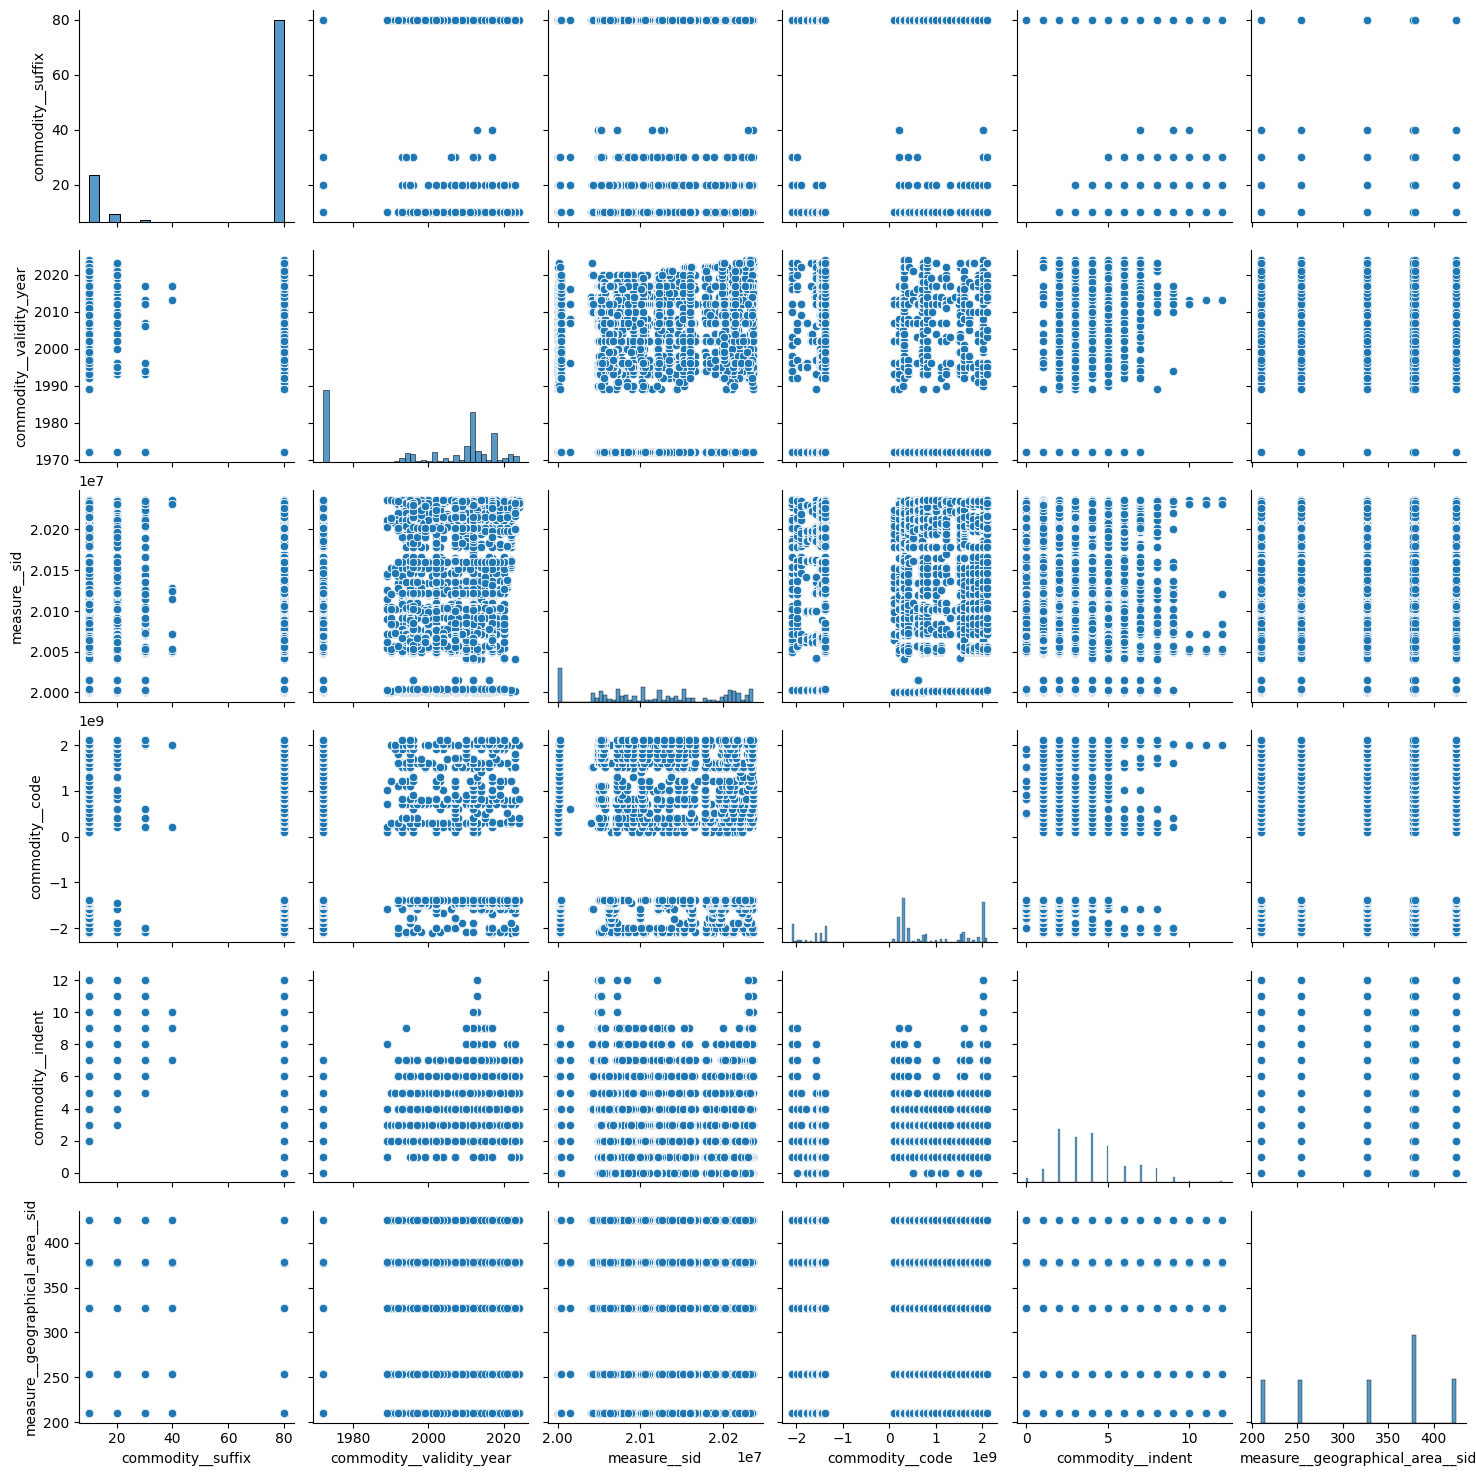

In [ ]:
sns.pairplot(MSC_data_Oceania[['commodity__suffix','commodity__validity_year', 'measure__sid', 'commodity__code', 'commodity__indent', 'measure__geographical_area__sid','commodity__validity_start']])

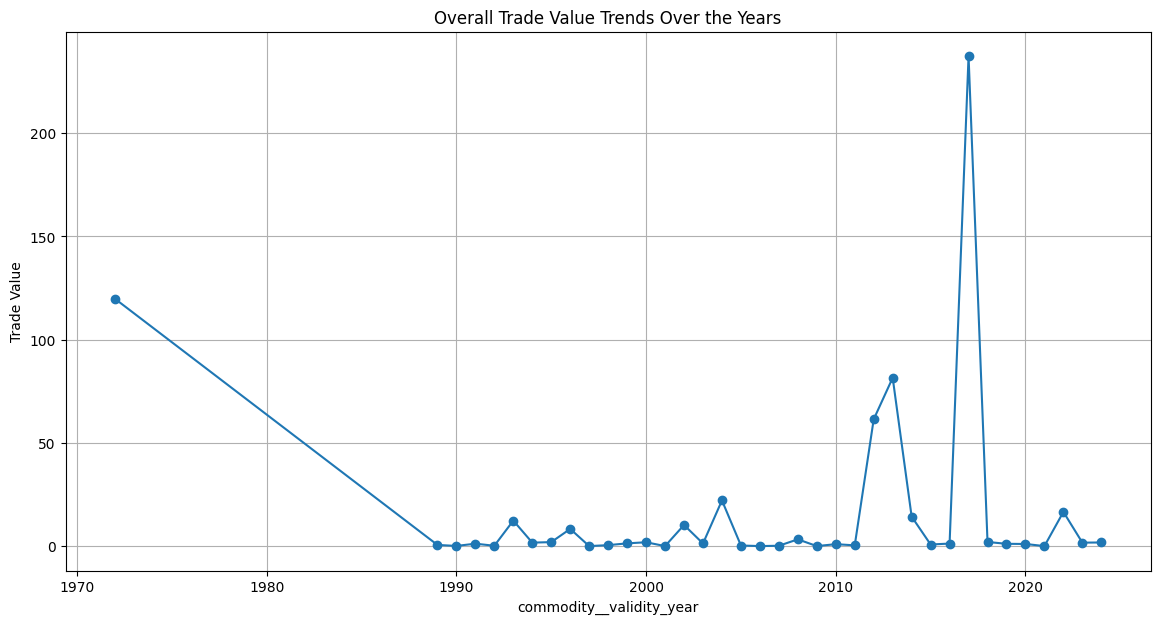

In [ ]:
MSC_data_Oceania['commodity__validity_year'] = pd.to_datetime(MSC_data_Oceania['commodity__validity_year'], format='%Y')

#Line Chart - Overall trade value trends over the years
annual_trade_value = MSC_data_Oceania.groupby(MSC_data_Oceania['commodity__validity_year'].dt.year)['measure__duty_expression'].sum()

plt.figure(figsize=(14, 7))
plt.plot(annual_trade_value.index, annual_trade_value.values, marker='o')
plt.title('Overall Trade Value Trends Over the Years')
plt.xlabel('commodity__validity_year')
plt.ylabel('Trade Value')
plt.grid(True)
plt.show()

In [ ]:
if 'commodity__validity_year' in MSC_data_Oceania.columns:
    MSC_data_Oceania['commodity__validity_year'] = pd.to_datetime(MSC_data_Oceania['commodity__validity_year'], format='%Y')

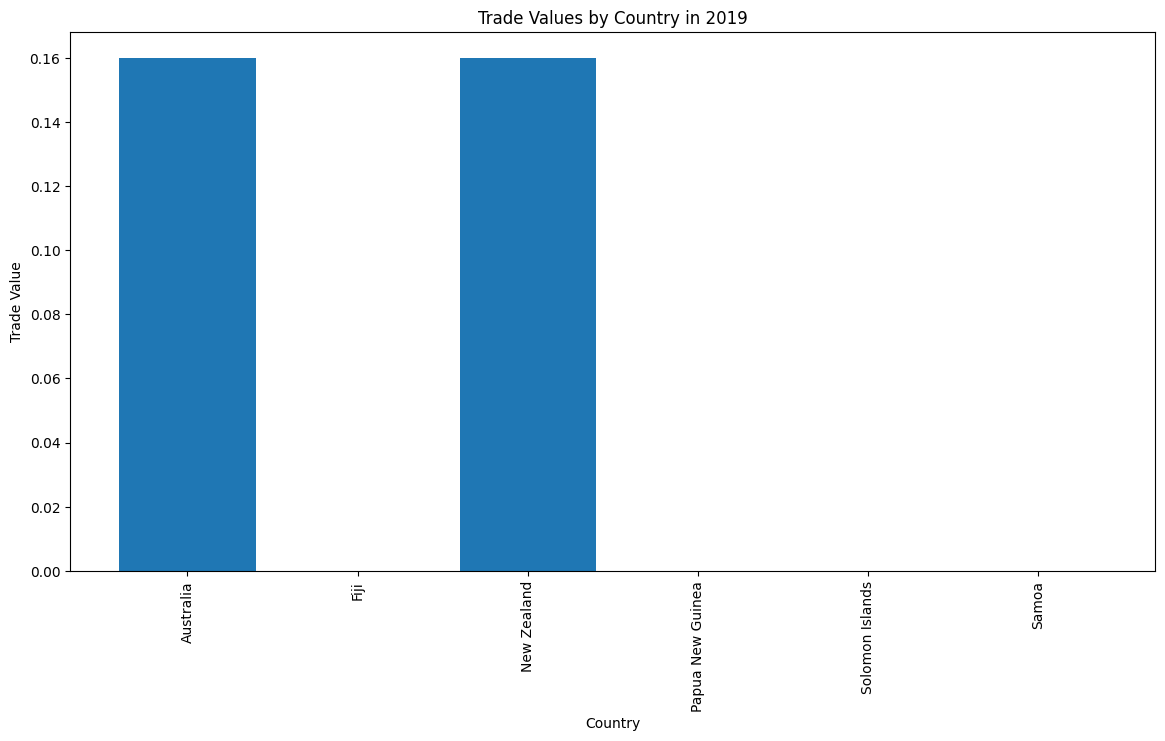

In [ ]:
# 2. Bar Chart: Trade values by country for a specific year
specific_year = 2019
year_data = MSC_data_Oceania[MSC_data_Oceania['commodity__validity_year'].dt.year == specific_year]
plt.figure(figsize=(14, 7))
plt.bar(year_data['measure__geographical_area__description'], year_data['measure__duty_expression'])
plt.title(f'Trade Values by Country in {specific_year}')
plt.xlabel('Country')
plt.ylabel('Trade Value')
plt.xticks(rotation=90)
plt.show()

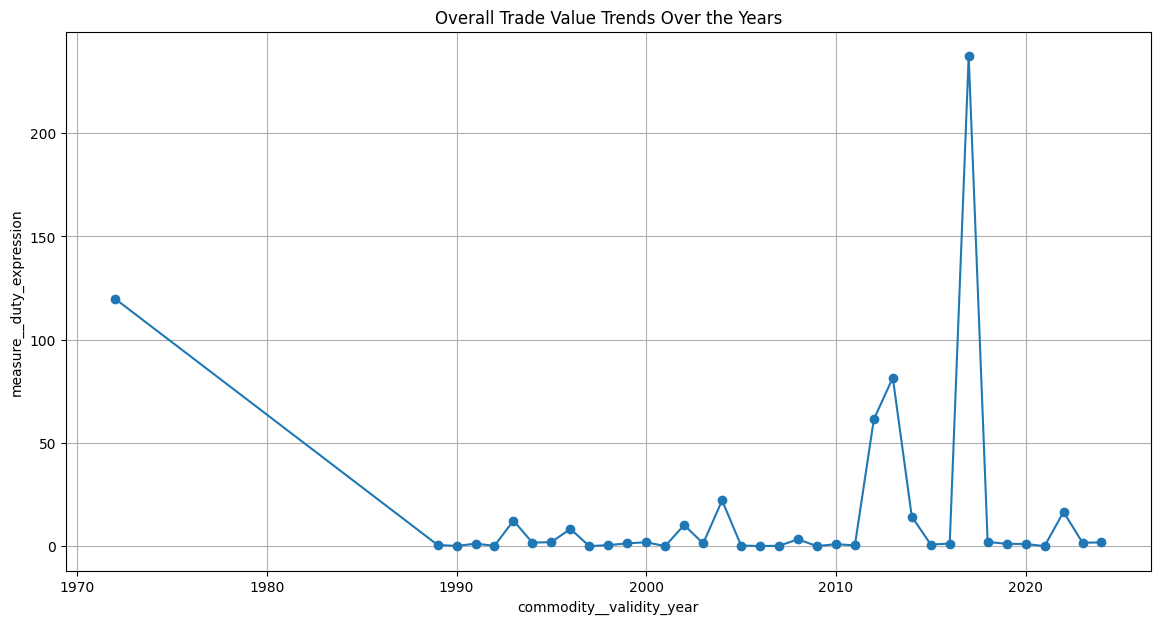

In [ ]:
# 1. Line Chart: Overall trade value trends over the years
annual_trade_value = MSC_data_Oceania.groupby(MSC_data_Oceania['commodity__validity_year'].dt.year)['measure__duty_expression'].sum()

plt.figure(figsize=(14, 7))
plt.plot(annual_trade_value.index, annual_trade_value.values, marker='o')
plt.title('Overall Trade Value Trends Over the Years')
plt.xlabel('commodity__validity_year')
plt.ylabel('measure__duty_expression')
plt.grid(True)
plt.show()

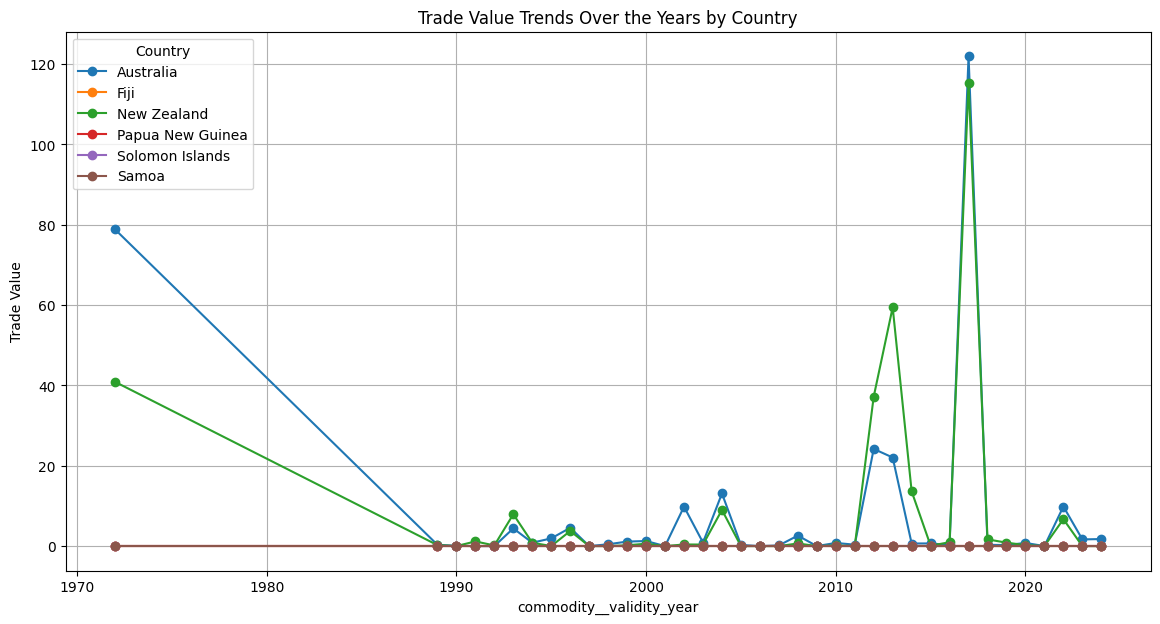

In [ ]:
# 1. Line Chart: Trade value trends over the years for each country
plt.figure(figsize=(14, 7))
for country in MSC_data_Oceania['measure__geographical_area__description'].unique():
    country_data = MSC_data_Oceania[MSC_data_Oceania['measure__geographical_area__description'] == country]
    annual_trade_value = country_data.groupby(country_data['commodity__validity_year'].dt.year)['measure__duty_expression'].sum()
    plt.plot(annual_trade_value.index, annual_trade_value.values, marker='o', label=country)
plt.title('Trade Value Trends Over the Years by Country')
plt.xlabel('commodity__validity_year')
plt.ylabel('Trade Value')
plt.legend(title='Country')
plt.grid(True)
plt.show()

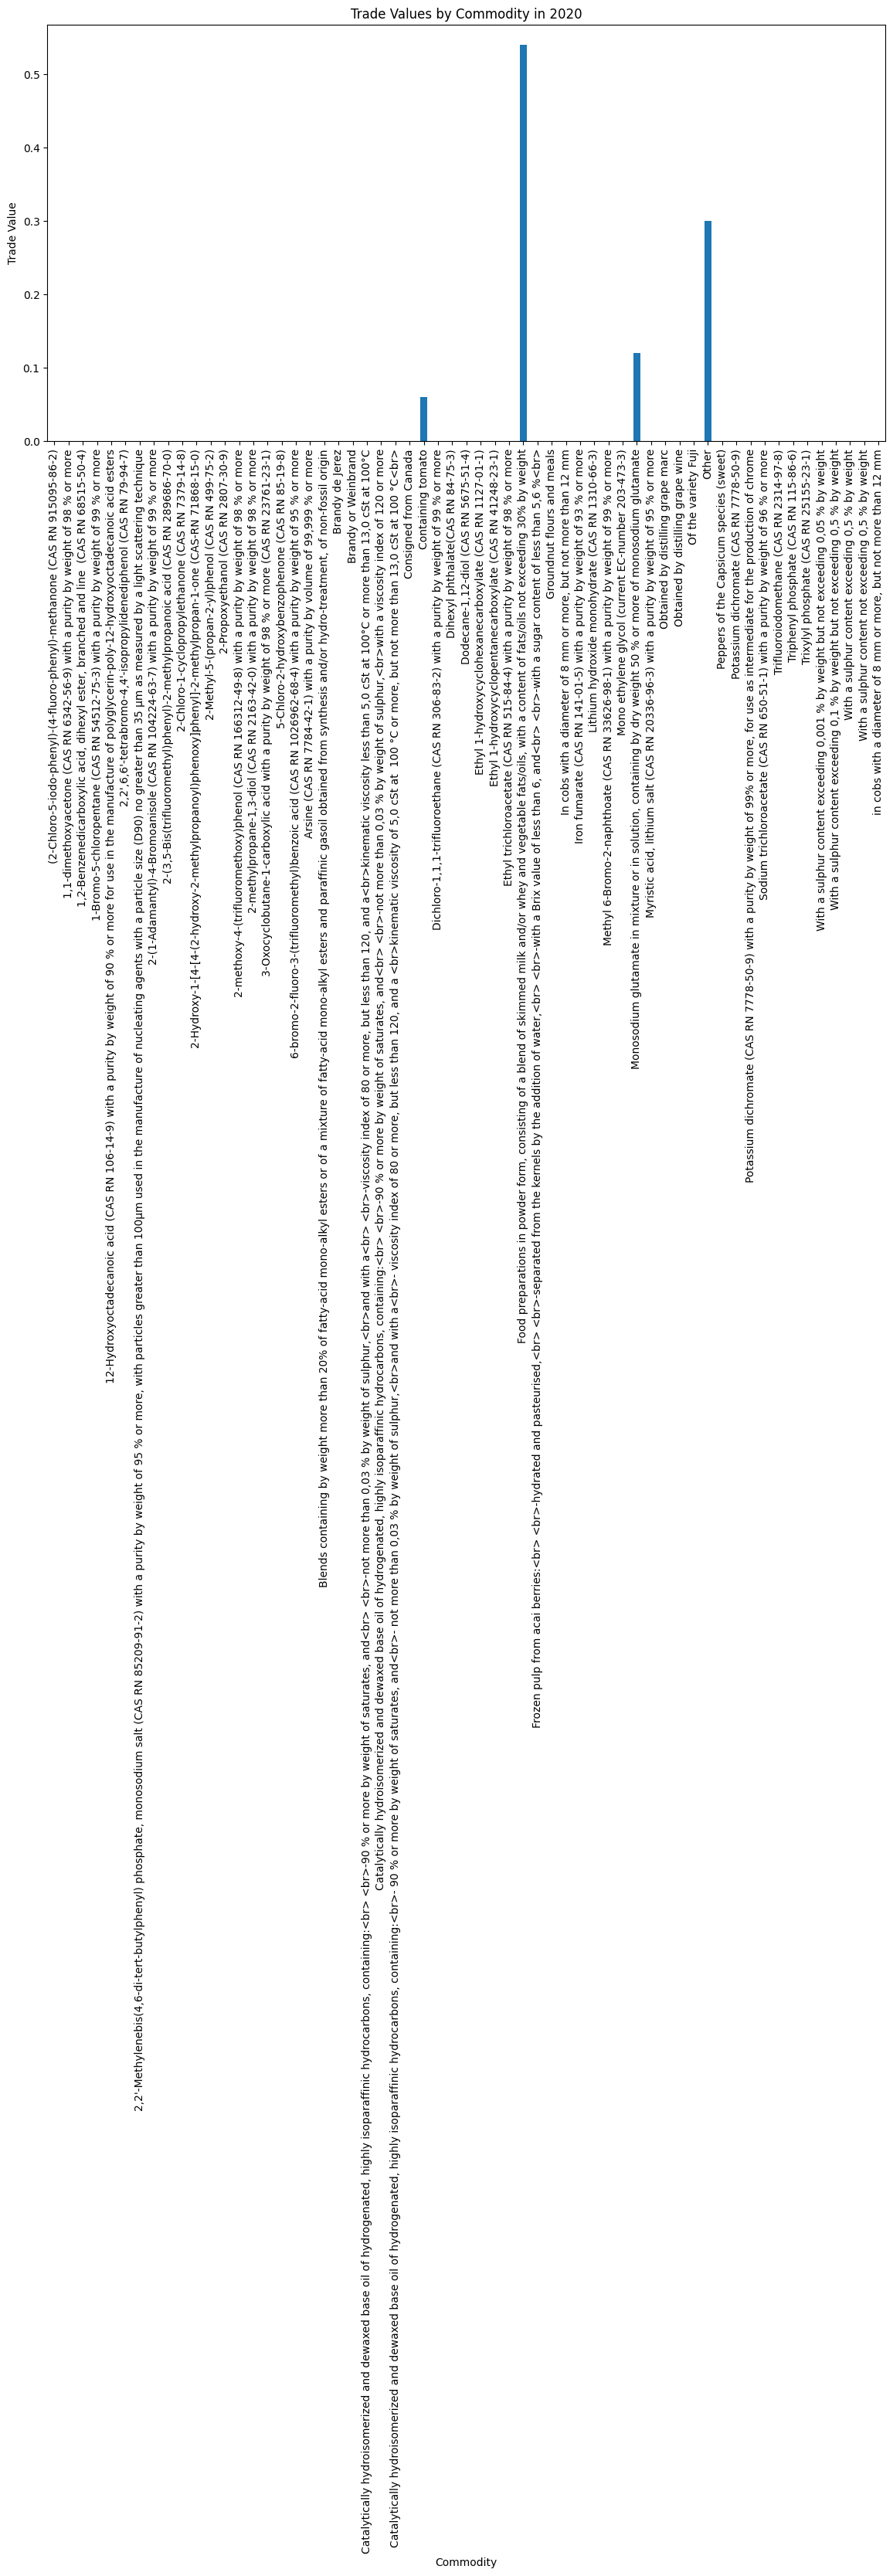

In [ ]:
# 2. Bar Chart: Compare trade values of different commodities for a specific year
specific_year = 2020
year_data = MSC_data_Oceania[MSC_data_Oceania['commodity__validity_year'].dt.year == specific_year]
commodity_trade_value = year_data.groupby('commodity__description')['measure__duty_expression'].sum()

plt.figure(figsize=(14, 7))
commodity_trade_value.plot(kind='bar')
plt.title(f'Trade Values by Commodity in {specific_year}')
plt.xlabel('Commodity')
plt.ylabel('Trade Value')
plt.xticks(rotation=90)
plt.show()

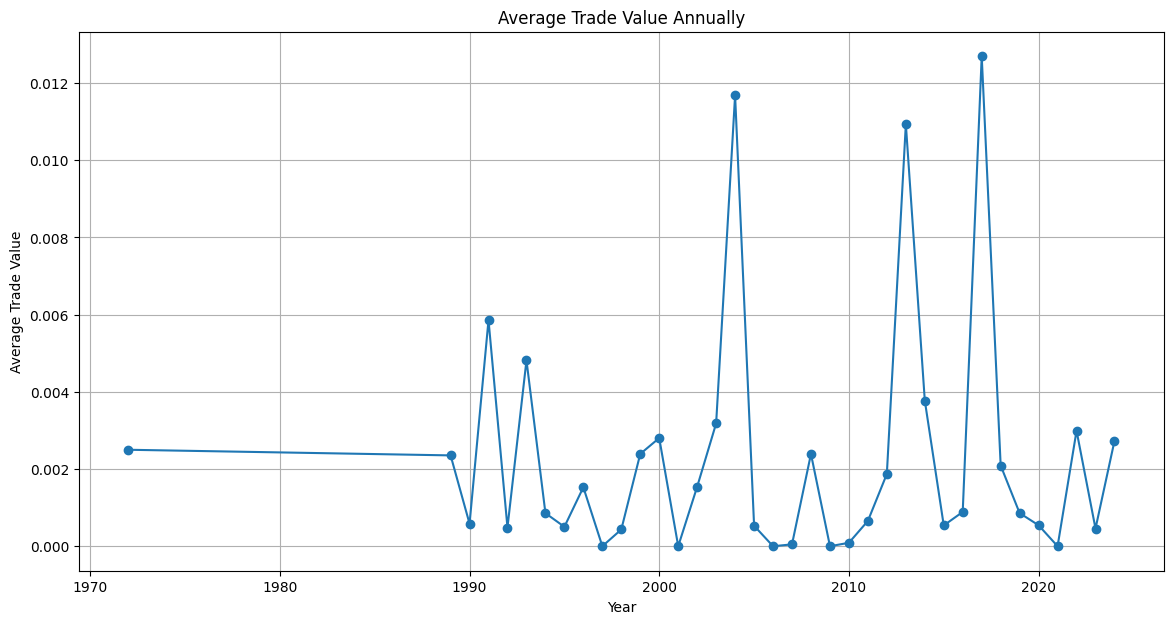

In [ ]:
annual_avg_trade_value = MSC_data_Oceania.groupby('commodity__validity_year')['measure__duty_expression'].mean()

# Plot the average trade value annually
plt.figure(figsize=(14, 7))
plt.plot(annual_avg_trade_value.index, annual_avg_trade_value.values, marker='o')
plt.title('Average Trade Value Annually')
plt.xlabel('Year')
plt.ylabel('Average Trade Value')
plt.grid(True)
plt.show()

In [ ]:
MSC_data_Oceania['commodity__description'].value_counts().head(12)

commodity__description
Other                                                                                                                                                                      40902
Of an actual alcoholic strength by volume not exceeding 13 % vol                                                                                                            1830
Consigned from Canada                                                                                                                                                       1800
Powdered                                                                                                                                                                    1692
Of an actual alcoholic strength by volume exceeding 13 % vol but not exceeding 15 % vol                                                                                     1668
Of bison                                                                                    

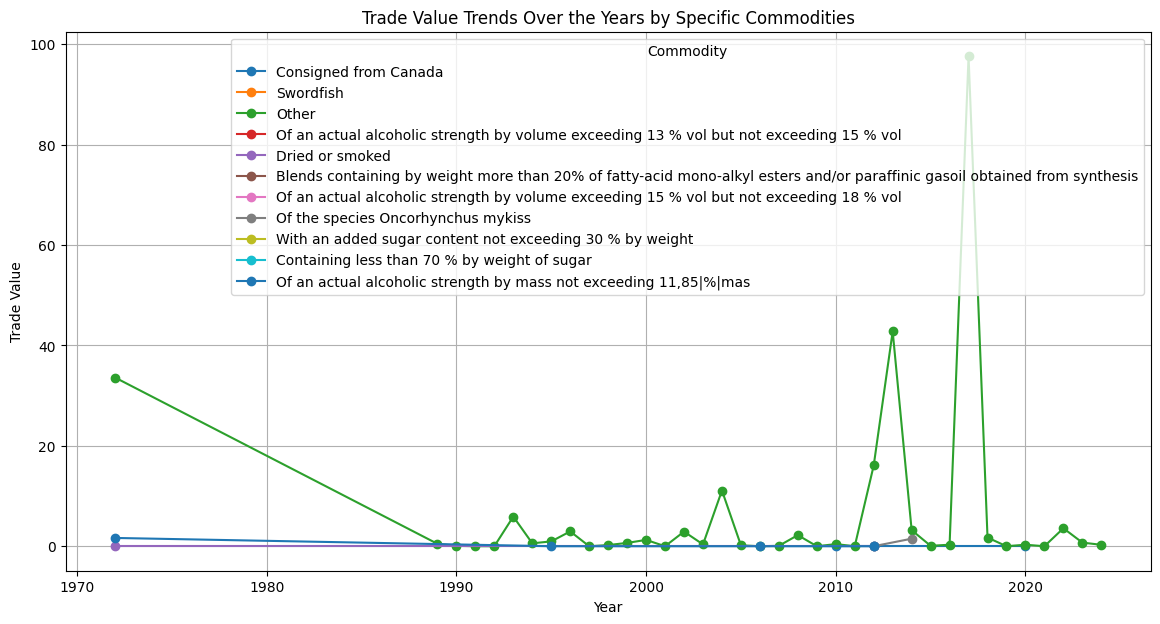

In [ ]:
# List of specific commodities to analyze
commodities_to_analyze = ['Consigned from Canada', 'Swordfish', 'Other', 'Of an actual alcoholic strength by volume exceeding 13 % vol but not exceeding 15 % vol', 'Dried or smoked', 'Blends containing by weight more than 20% of fatty-acid mono-alkyl esters and/or paraffinic gasoil obtained from synthesis', 'Of an actual alcoholic strength by volume exceeding 15 % vol but not exceeding 18 % vol', 'Of the species Oncorhynchus mykiss', 'With an added sugar content not exceeding 30 % by weight ', 'Containing less than 70 % by weight of sugar', 'Of an actual alcoholic strength by mass not exceeding 11,85|%|mas']

# Filter data for specific commodities
filtered_df = MSC_data_Oceania[MSC_data_Oceania['commodity__description'].isin(commodities_to_analyze)]

# 1. Line Chart: Trade value trends over the years for each specific commodity
plt.figure(figsize=(14, 7))
for commodity in commodities_to_analyze:
    commodity_data = filtered_df[filtered_df['commodity__description'] == commodity]
    annual_trade_value = commodity_data.groupby(commodity_data['commodity__validity_year'].dt.year)['measure__duty_expression'].sum()
    plt.plot(annual_trade_value.index, annual_trade_value.values, marker='o', label=commodity)
plt.title('Trade Value Trends Over the Years by Specific Commodities')
plt.xlabel('Year')
plt.ylabel('Trade Value')
plt.legend(title='Commodity')
plt.grid(True)
plt.show()

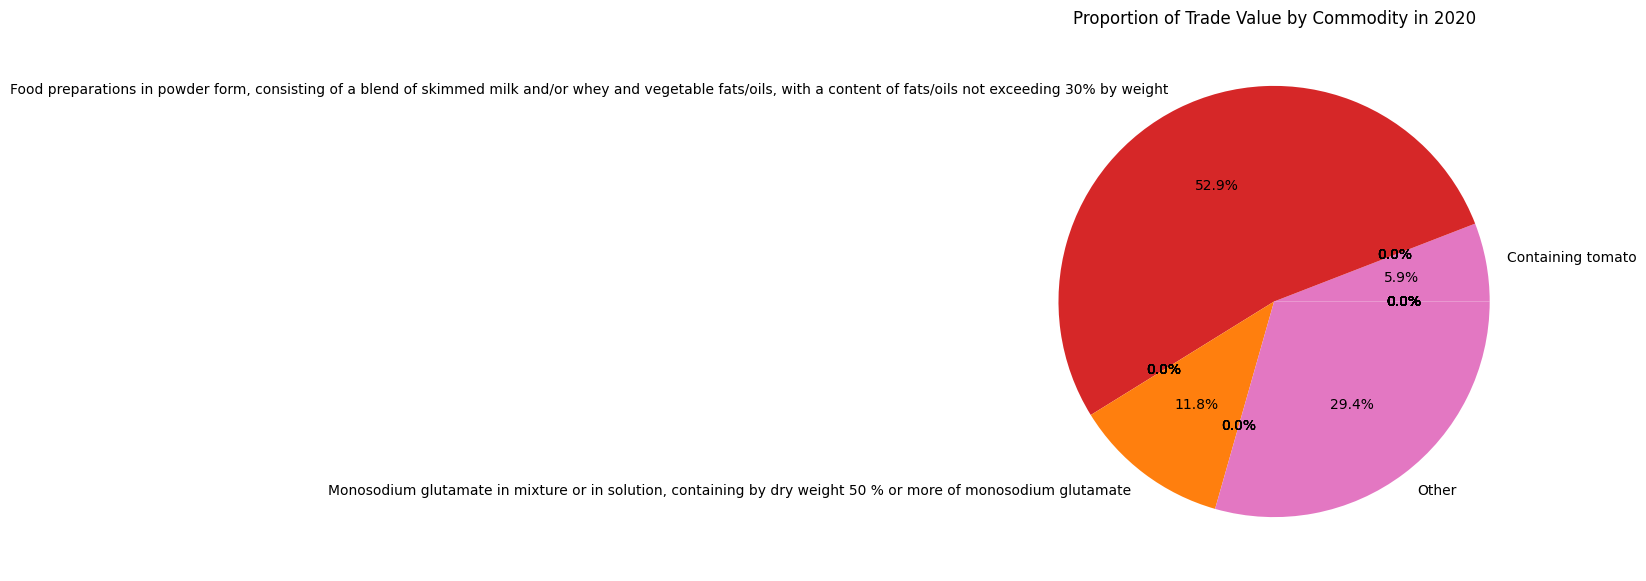

In [ ]:
# Plot 3: Pie Chart - Proportion of trade value by commodity for a specific year
plt.figure(figsize=(14, 7))
commodity_trade_value.plot(kind='pie', autopct='%1.1f%%')
plt.title(f'Proportion of Trade Value by Commodity in {specific_year}')
plt.ylabel('')
plt.show()

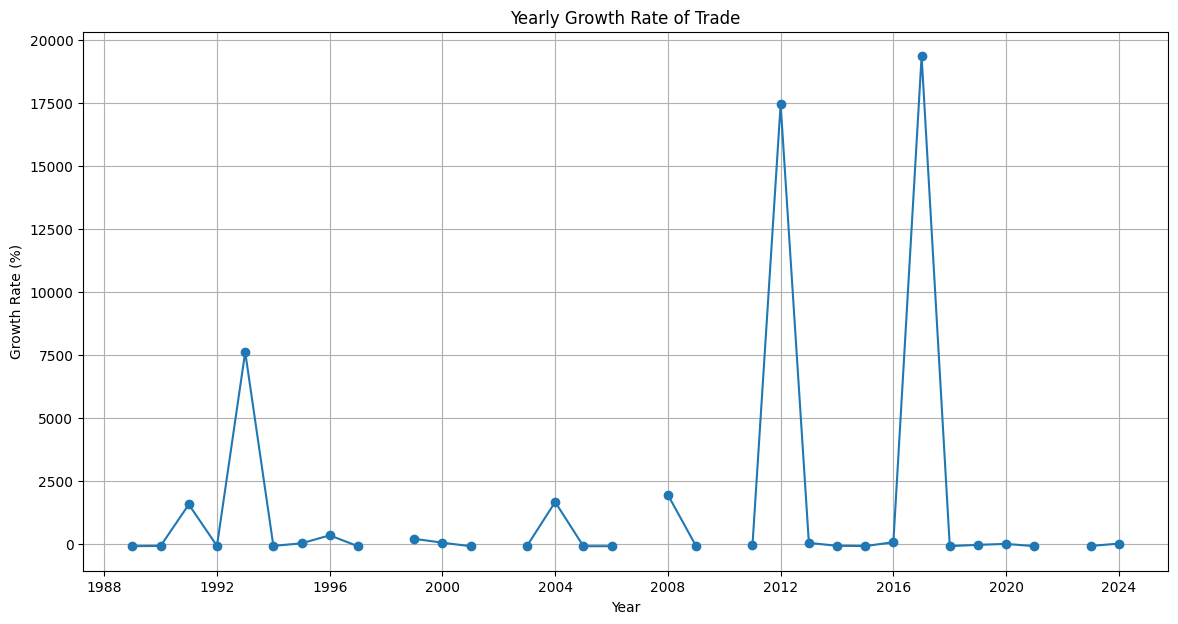

In [ ]:
# Calculate the annual trade value
annual_trade_value = MSC_data_Oceania.groupby('commodity__validity_year')['measure__duty_expression'].sum()

# Calculate the yearly growth rate
annual_growth_rate = annual_trade_value.pct_change() * 100

# Plot the yearly growth rate
plt.figure(figsize=(14, 7))
plt.plot(annual_growth_rate.index, annual_growth_rate.values, marker='o')
plt.title('Yearly Growth Rate of Trade')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.grid(True)
plt.show()

# ***Objective 1: Predict Trade Volume Based on Tariff Rates for Oceania***

In [ ]:
X = MSC_data_Oceania.drop(columns=['measure__duty_expression'])
y = MSC_data_Oceania['measure__duty_expression']

In [ ]:
# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

In [ ]:
# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

In [ ]:
# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [ ]:
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

In [ ]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Define and train the model
models = {
    'Linear Regression': LinearRegression(),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}
results = {}
confusion_matrices = {}
accuracies = {}

In [ ]:
# Encode categorical variables
label_encoders = {}
categorical_columns = ['measure__type__description', 'commodity__suffix',
                       'commodity__validity_start', 'commodity__description',
                       'measure__geographical_area__description']

for column in categorical_columns:
    le = LabelEncoder()
    MSC_data_Oceania[column] = le.fit_transform(MSC_data_Oceania[column])
    label_encoders[column] = le


In [ ]:
# Encode categorical variables
for column in categorical_columns:
    le = LabelEncoder()
    MSC_data_Oceania[column] = le.fit_transform(MSC_data_Oceania[column])

# Select features and target
X = MSC_data_Oceania.drop(['measure__duty_expression'], axis=1)
y = MSC_data_Oceania['measure__duty_expression']

# Check for datetime columns and convert them to numerical representation
for col in X.select_dtypes(include=['datetime64']).columns:
    X[col] = X[col].astype(np.int64) // 10**9  # Convert to Unix timestamp (seconds)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regression': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regression': GradientBoostingRegressor(random_state=42)
}

# Train and evaluate the models
results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy percentage
    accuracy = np.mean(np.round(y_test) == np.round(y_pred)) * 100

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'Mean Squared Error': mse, 'R^2 Score': r2,  'Accuracy Percentage': accuracy}
results_df = pd.DataFrame(results).T
results_df

,Mean Squared Error,R^2 Score,Accuracy Percentage
Linear Regression,0.000366,0.075311,100.0
Random Forest Regression,0.000203,0.488775,100.0
Gradient Boosting Regression,0.000209,0.472155,100.0


# ***Objective 2: Classify Commodities Based on Tariff Categories for Oceania***

In [ ]:
# Encode categorical columns using LabelEncoder
label_encoders = {}
categorical_columns = ['measure__type__description', 'commodity__suffix',
                       'commodity__validity_start', 'commodity__description',
                       'measure__geographical_area__description', 'measure__duty_expression']

for column in categorical_columns:
    le = LabelEncoder()
    MSC_data_Oceania[column] = le.fit_transform(MSC_data_Oceania[column])
    label_encoders[column] = le

In [ ]:
# Features and target variable
X = MSC_data_Oceania.drop(columns=['commodity__suffix'])
y = MSC_data_Oceania['commodity__suffix']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Encode categorical columns using LabelEncoder
label_encoders = {}
categorical_columns = ['measure__type__description', 'commodity__suffix',
                       'commodity__validity_start', 'commodity__description',
                       'measure__geographical_area__description', 'measure__duty_expression']

for column in categorical_columns:
    le = LabelEncoder()
    MSC_data_Oceania[column] = le.fit_transform(MSC_data_Oceania[column])
    label_encoders[column] = le

# Features and target variable
X = MSC_data_Oceania.drop(columns=['commodity__suffix'])
y = MSC_data_Oceania['commodity__suffix']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check for datetime columns and convert them to numerical representation
for col in X_train.select_dtypes(include=['datetime64']).columns:
    X_train[col] = X_train[col].astype(np.int64) // 10**9  # Convert to Unix timestamp (seconds)
    X_test[col] = X_test[col].astype(np.int64) // 10**9   # Do the same for the test set

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # Fit and transform on the training set
X_test = scaler.transform(X_test) # Only transform the test set

In [ ]:
# Train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
confusion_matrix_dt = confusion_matrix(y_test, y_pred_dt)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print(f'Decision Tree Accuracy: {accuracy_dt}')

Decision Tree Accuracy: 0.9997685720897941


In [ ]:
# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
accuracy_knn = accuracy_score(y_test, y_pred_rf)
conf_matrix_knn = confusion_matrix(y_test, y_pred_rf)
print(f'Random Forest model Accuracy: {accuracy_knn * 100}')

Random Forest model Accuracy: 99.65864383244619


In [ ]:
# Train the k-NN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print(f'k-NN Accuracy: {accuracy_knn * 100}')

k-NN Accuracy: 83.47894006017125


In [ ]:
# Store confusion matrices in a dictionary for easy display
confusion_matrices = {
    'Decision Tree': confusion_matrix_dt,
    'k-NN': confusion_matrix_knn,
    'RF': confusion_matrix_rf
}

In [ ]:
for name, matrix in confusion_matrices.items():
    print(f"{name} Confusion Matrix:\n{matrix}\n")

Decision Tree Confusion Matrix:
[[ 6316     0     0     0     6]
 [    0  1008     0     0     0]
 [    0     0   191     0     0]
 [    0     0     0    22     0]
 [    2     0     0     0 27023]]

k-NN Confusion Matrix:
[[ 2927   125    17     2  3251]
 [  235   415    30     0   328]
 [   40    26    55     0    70]
 [   19     1     0     2     0]
 [ 1387   146    33     1 25458]]

RF Confusion Matrix:
[[ 6239     0     0     0    83]
 [    0  1008     0     0     0]
 [    0     0   191     0     0]
 [    0     0     0    22     0]
 [   35     0     0     0 26990]]



In [ ]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print evaluation metrics
    print(f"{model_name} Model Evaluation:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Decision Tree Model Evaluation:
Accuracy: 0.9998
Precision: 0.9998
Recall: 0.9998
F1 Score: 0.9998


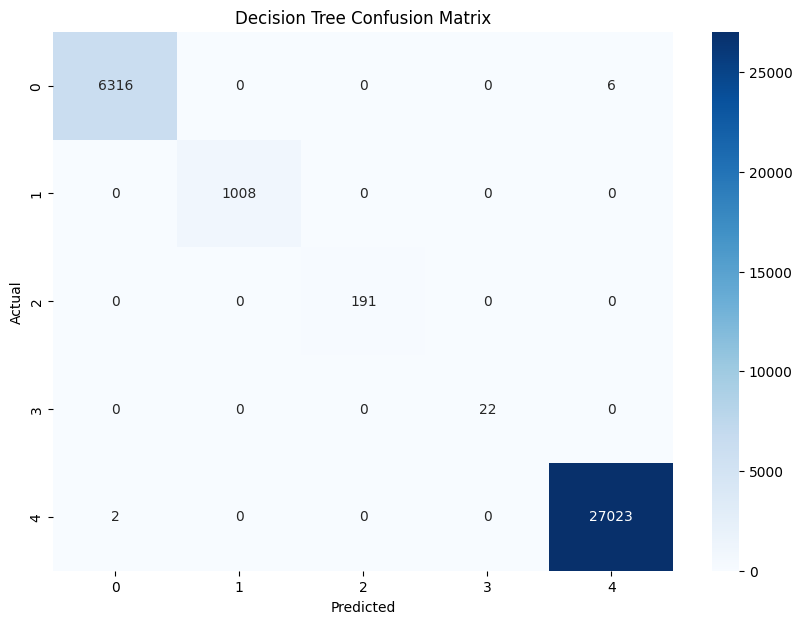

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
evaluate_model(dt_model, X_train, X_test, y_train, y_test, 'Decision Tree')

Random Forest Model Evaluation:
Accuracy: 0.9966
Precision: 0.9966
Recall: 0.9966
F1 Score: 0.9966


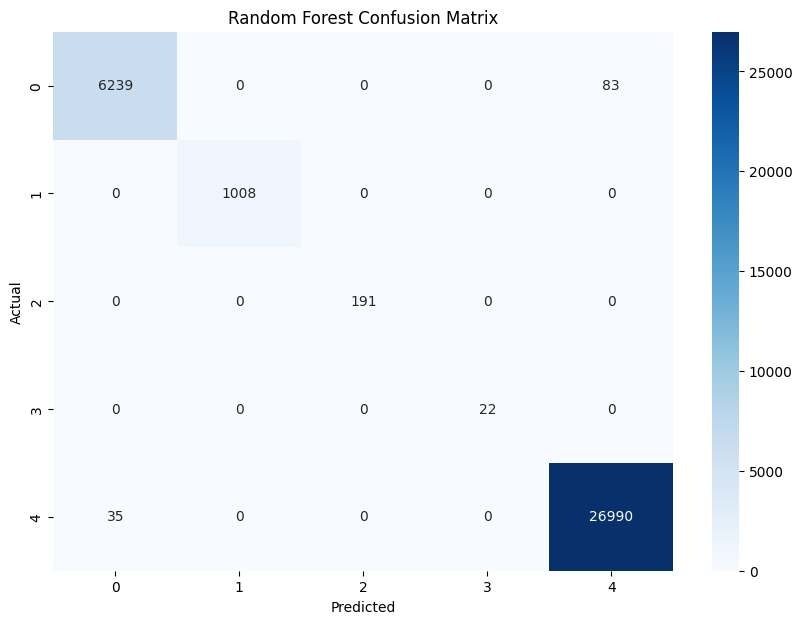

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
evaluate_model(rf_model, X_train, X_test, y_train, y_test, 'Random Forest')

k-NN Model Evaluation:
Accuracy: 0.8348
Precision: 0.8194
Recall: 0.8348
F1 Score: 0.8231


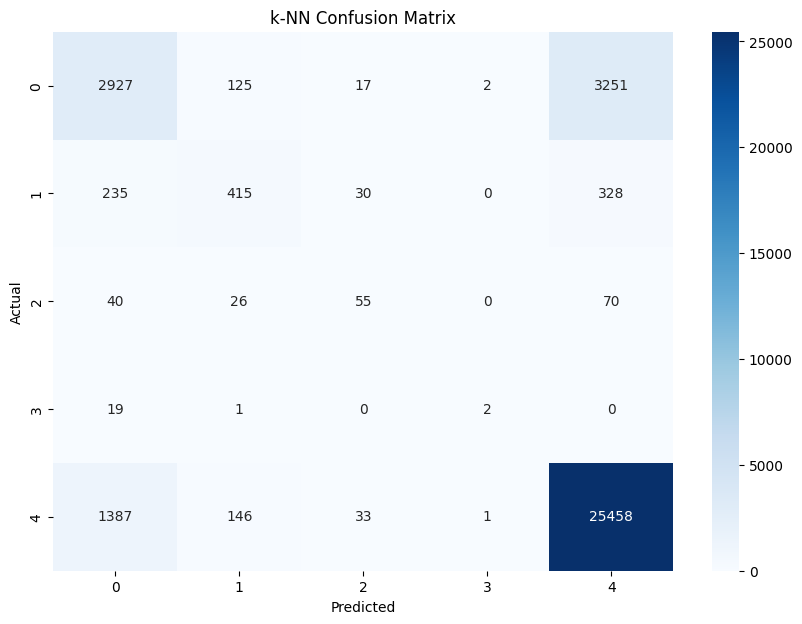

In [ ]:
knn_model = KNeighborsClassifier()
evaluate_model(knn_model, X_train, X_test, y_train, y_test, 'k-NN')

# ***Objective 3: Cluster Commodities with Similar Tariff Structures for Oceania***

In [ ]:
cols = ['commodity__code','measure__duty_expression']
MSC_data_Oceania1 =  MSC_data_Oceania[cols]

In [ ]:
WCSS = []
for i in range(1,10):
  kn = KMeans(n_clusters=i)
  kn.fit(MSC_data_Oceania1)
  WCSS.append(kn.inertia_)

In [ ]:
WCSS

[3.094096816013086e+23,
 7.579304811610297e+22,
 1.1180908882714979e+22,
 6.885270043576527e+21,
 3.5998630921804993e+21,
 1.5856247085103196e+21,
 1.0783588370766312e+21,
 8.309462508634221e+20,
 5.967286601552339e+20]

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

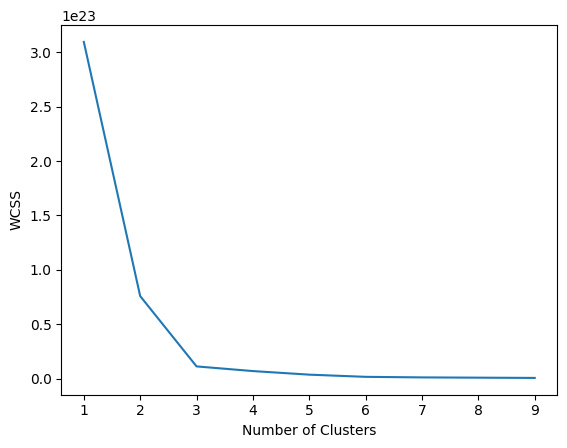

In [ ]:
plt.plot(range(1,10),WCSS)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt

In [ ]:
x = MSC_data_Oceania1.iloc[:,:].values
km = KMeans(n_clusters=3)
y_mean = km.fit_predict(x)

In [ ]:
y_mean

array([1, 1, 1, ..., 2, 2, 2], dtype=int32)

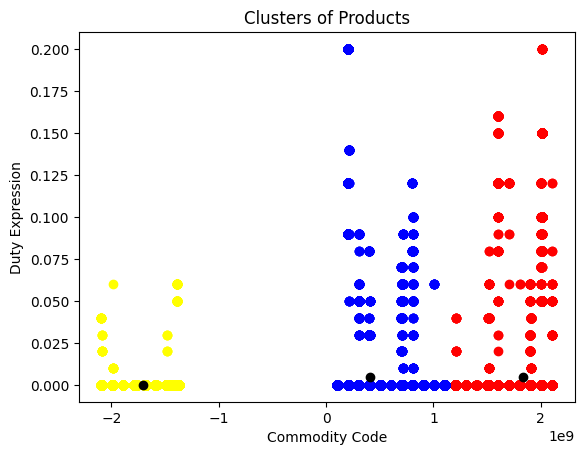

In [ ]:
plt.scatter(x[y_mean == 0,0],x[y_mean == 0,1], color = 'red')
plt.scatter(x[y_mean == 1,0],x[y_mean == 1,1], color = 'blue')
plt.scatter(x[y_mean == 2,0],x[y_mean == 2,1], color = 'yellow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color = 'black')
plt.title('Clusters of Products')
plt.xlabel('Commodity Code')
plt.ylabel('Duty Expression')
plt.show()

## ***4. Forecast Future Tariff Rates and Trade Volumes for Oceania***

In [ ]:
# Select relevant features
selected_columns = [
    'commodity__code',
    'measure__geographical_area__description',
    'measure__duty_expression',
    'commodity__validity_start'
]

In [ ]:
MSC_data_Oceania_selected = MSC_data_Oceania[selected_columns]

In [ ]:
# Preprocessing
MSC_data_Oceania['commodity__validity_start'] = pd.to_datetime(MSC_data_Oceania['commodity__validity_start'])

In [ ]:
# Import necessary module
from sklearn.preprocessing import MinMaxScaler, LabelEncoder


In [ ]:
label_encoder = LabelEncoder()
scaler = MinMaxScaler()
MSC_data_Oceania['measure__geographical_area__description'] = label_encoder.fit_transform(MSC_data_Oceania['measure__geographical_area__description'])
MSC_data_Oceania[['commodity__code', 'measure__duty_expression']] = scaler.fit_transform(MSC_data_Oceania[['commodity__code', 'measure__duty_expression']])
MSC_data_Oceania.sort_values('commodity__validity_start', inplace=True)

In [ ]:
# Prepare data for LSTM
sequence_length = 10
def create_sequences(MSC_data_Oceania, seq_length):
    xs, ys = [], []
    for i in range(len(MSC_data_Oceania) - seq_length):
        x = MSC_data_Oceania[i:i+seq_length]
        y = MSC_data_Oceania[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

model_data = MSC_data_Oceania[['commodity__code', 'measure__geographical_area__description', 'measure__duty_expression']].values
X, y = create_sequences(model_data, sequence_length)

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Build and train the improved LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=(sequence_length, 3)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(50)))
model.add(Dropout(0.2))
model.add(Dense(3))

model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2, callbacks=[early_stopping, reduce_lr])


Epoch 1/10
1729/1729 [==============================] - 83s 40ms/step - loss: 0.7135 - val_loss: 0.5859 - lr: 0.0010
Epoch 2/10
1729/1729 [==============================] - 66s 38ms/step - loss: 0.5593 - val_loss: 0.5137 - lr: 0.0010
Epoch 3/10
1729/1729 [==============================] - 62s 36ms/step - loss: 0.5164 - val_loss: 0.4884 - lr: 0.0010
Epoch 4/10
1729/1729 [==============================] - 62s 36ms/step - loss: 0.4948 - val_loss: 0.4789 - lr: 0.0010
Epoch 5/10
1729/1729 [==============================] - 62s 36ms/step - loss: 0.4828 - val_loss: 0.4684 - lr: 0.0010
Epoch 6/10
1729/1729 [==============================] - 63s 36ms/step - loss: 0.4718 - val_loss: 0.4614 - lr: 0.0010
Epoch 7/10
1729/1729 [==============================] - 62s 36ms/step - loss: 0.4644 - val_loss: 0.4560 - lr: 0.0010
Epoch 8/10
1729/1729 [==============================] - 64s 37ms/step - loss: 0.4566 - val_loss: 0.4508 - lr: 0.0010
Epoch 9/10
1729/1729 [==============================] - 71s 41ms

In [ ]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')


1081/1081 [==============================] - 13s 12ms/step - loss: 0.4327
Test Loss: 0.43270424008369446


In [ ]:
# Make predictions
predictions = model.predict(X_test)

1081/1081 [==============================] - 19s 13ms/step


In [ ]:
# Example: Display the first 5 predictions and actual values
for i in range(5):
    print(f'Prediction: {predictions[i]}, Actual: {y_test[i]}')

Prediction: [7.0617229e-01 3.2006402e+00 2.8804317e-03], Actual: [0.73797506 3.         0.        ]
Prediction: [ 7.9834574e-01  2.8425753e+00 -1.6195569e-03], Actual: [0.97669079 4.         0.        ]
Prediction: [ 0.6527463   4.537173   -0.01572798], Actual: [0.69155538 5.         0.        ]
Prediction: [ 0.6042671   4.7192106  -0.03193368], Actual: [0.57160752 5.         0.        ]
Prediction: [ 0.22537392  2.9115882  -0.01750901], Actual: [0.12145111 0.         0.        ]


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
# Calculate MAE, RMSE, and MAPE
def calculate_metrics(predictions, actuals):
    mae = np.mean(np.abs(predictions - actuals))
    rmse = np.sqrt(np.mean((predictions - actuals) ** 2))

    # Handling division by zero in MAPE calculation
    non_zero_actuals = np.where(actuals != 0, actuals, np.nan)
    mape = np.nanmean(np.abs((predictions - non_zero_actuals) / non_zero_actuals)) * 100

    return mae, rmse, mape

In [ ]:
mae, rmse, mape = calculate_metrics(predictions, y_test)
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}%')

MAE: 0.2685779018586151
RMSE: 0.6578024262836438
MAPE: 1766.0789268000674%
